### ClickHouse Introduction
ClickHouse - **distributed relational analytical column-oriented DBMS.** ClickHouse was developed by Yandex for a tool called Yandex Metrica (web analytics). The main difference is that **the data is stored/inserted into columns not rows.**

### DBMS Types
Almost all DBMS can split into two categories: *Relational (SQL)* and *Non Relational (No SQL)*

**Relational (SQL)**
- Data is stored into 2-D tables (cloumns and rows)
- Data is inserted using rows (except for ClickHouse)
- Tables can be related with each other using keys

**Non Relational (No SQL):**
- data is storead into graphs, documents, key-value

### OLTP vs OLAP
**OLTP (Online Transaction Processing)** - transcation system, transaction processing in real time. A way of organizing a DB when a system works with small transactions bun in fast stream. Minnimum response time is required.

**Main Principles**
- Main operations: insert, deleteand updated
- Transactions (continuous/many requests)
- Consistency 

**OLAP (Online Analytical Processing)** - analytical processing that involes preparation of aggregated data based on big data.

**Main Principles**
- Main operations: reading (a lot), inserting (little)
- Aggregation
- **Not many requests**

### Row-Oriented DB
In Row-Oriented DataBase all data is stored in rows. On HDD the data is physically stored into rows and next to each other. 

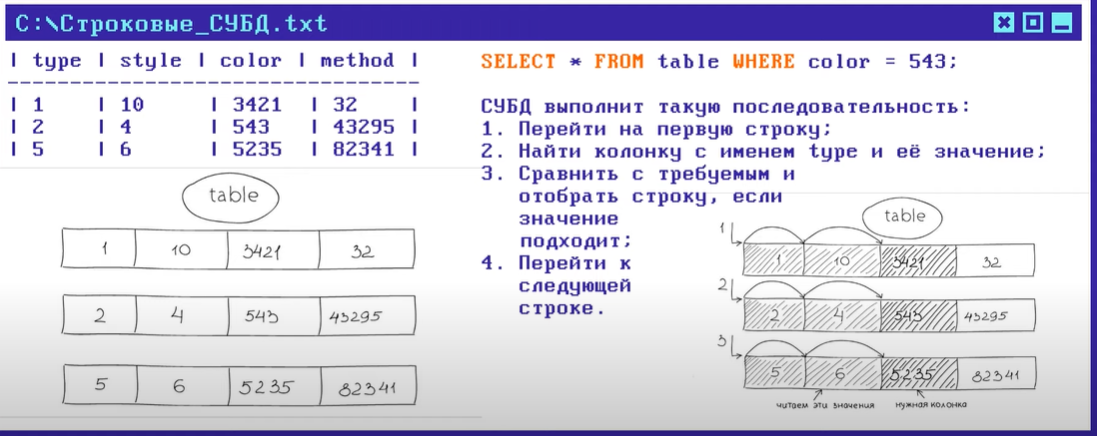

**Disadvantage**
- Slow efficiency on tables with many rows (big data)
- Each row and each column must be checked. All columns always take part in a query (unnecessary columns cannot be skipped)
- All rows always must be read during a query execution

### Column-Oriented DB
In column-oriented DB the data is stored into columns. On HDD the data is physically stored next to each other by columns.  
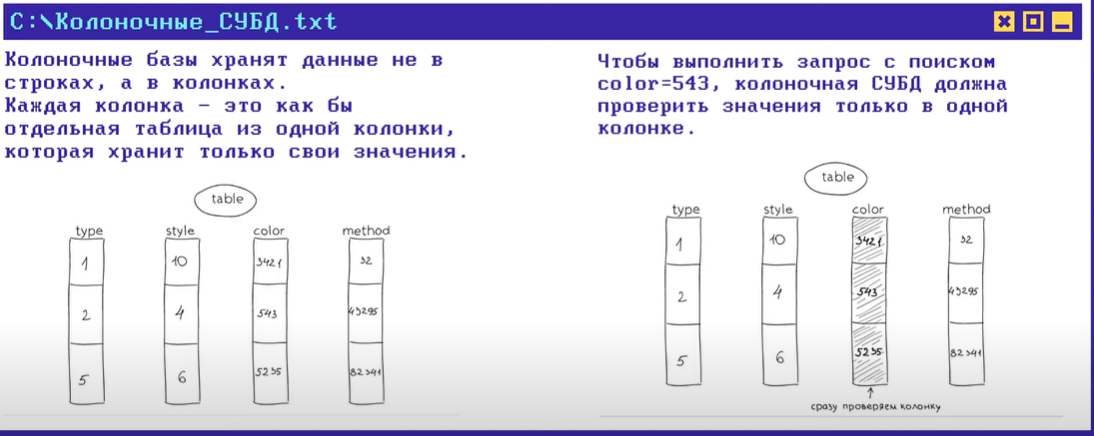
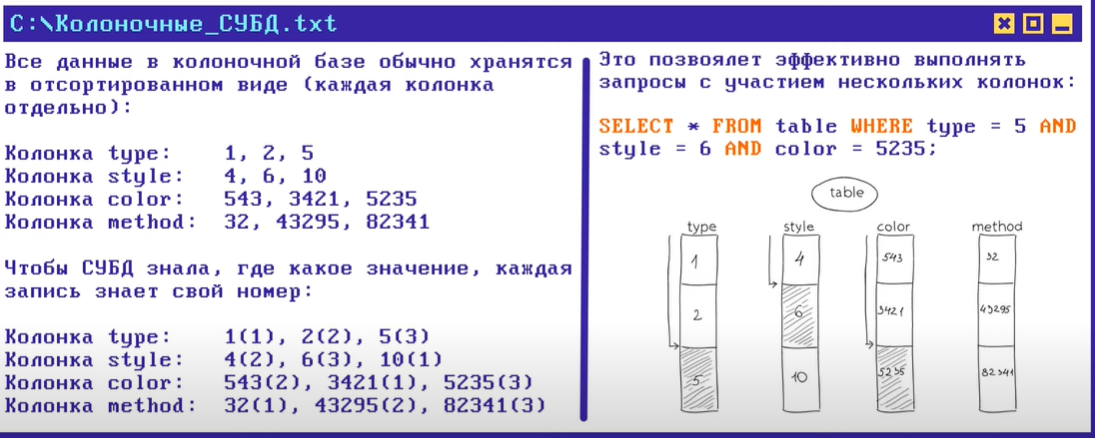

In the picture above we will only need to **execute search operation 3 times on sorted data (super fast)**

### ClickHouse Advatages
- Super fast for continuous data streaming (ClickHouse: 100m records - 1s, MySQL: 100m records - 823s)
- Each column is stored in a separate file on a HDD (easy compressing - each column has only one type not many, fast reading)
- Sampling availabilty: take sampple from data to get a rough estimate (salary, n unique users)
- Linear scaling: data replication increase efficiency
- Has HTTP protocol for data sending and getting 
- Parallel query execution on separate CPU cores. 
- Distributed query execution on different servers.

### ClickHouse Disadvantages
- HTTP protocol may be a bottle neck for hacking (additional requirements for security)
- There is no `UPDATE` and `DELETE`. However, data can be deleted and updated
- There is no `Primary Key`. However, it still can be implemented using `ORDER BY`
- Asynchronos mode:
    - There are **no transactions and blocks** due to async execution
    - There is no guarantee that the data will be delivered in a certain order. It only guarantees that the data will be delivered anyway somewhere!
    - There is no guarantee that after replication the data will appear instantly in a new place
- Pinpoint data deletion and update is highly inefficient (better use big batches)
- Requires a lot of RAM for high efficiency 



### When to Use ClickHouse?
- Analytics (web, apps)
- When the order of data stream is not important
- Big Data with the main focus on Data Analytics (aggregation)
- Data is not oftenly deleted (small number of delete operations)
- Many different data types (efficient compressing, storage and reading)
- We are not afraid of small data loss due to async execution

### ClickHouse Tips
- Don't insert by one row. Insert by big batches instead (10k, 50k):
    - Insertion time for one row and 10k rows is equall. Thus, inserting 10k rows by one will take 10k more time!
- Don't read by one row. Apply analytics, select many rows instead
- Always select only neened columns
    - Analytics on all columns will lead to MySQL efficiency 
- All aggregation operations better execute on ClickHouse side
    - Less data is transfered via net, fast data processing 
- Define correct data types for the columns
    - Efficient compressing (faster search and less memory on HDD)

- Columns don't have physuqcal relationship between each other. Each column is stored in a separate file on a HDD (provides high efficiency when reading a file)